In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,  precision_recall_curve, auc
from sklearn.model_selection import RandomizedSearchCV
import pickle
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV 
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve


In [4]:
df = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [6]:
df.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

<Axes: >

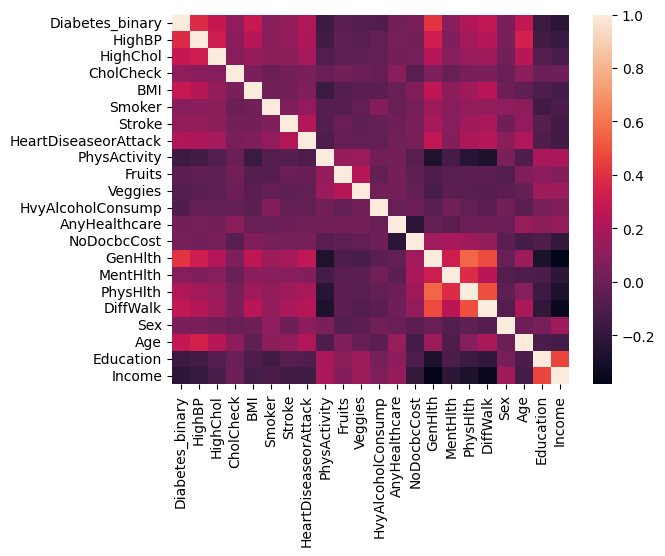

In [7]:
sns.heatmap(df.corr())

In [8]:
df2 = df.drop(['AnyHealthcare','NoDocbcCost','Fruits','Veggies','Sex','Education','Income','MentHlth','PhysHlth'], axis=1)

In [9]:
df2

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,DiffWalk,Age
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,4.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,12.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,13.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,11.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,6.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,10.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,0.0,5.0,1.0,13.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,11.0


In [10]:
df2["Diabetes_binary"] = df2["Diabetes_binary"].astype(int)
df2["HighBP"] = df2["HighBP"].astype(int)
df2["CholCheck"] = df2["CholCheck"].astype(int)
df2["Smoker"] = df2["Smoker"].astype(int)
df2["Stroke"] = df2["Stroke"].astype(int)
df2["HeartDiseaseorAttack"] = df2["HeartDiseaseorAttack"].astype(int)
df2["PhysActivity"] = df2["PhysActivity"].astype(int)
df2["HvyAlcoholConsump"] = df2["HvyAlcoholConsump"].astype(int)
df2["GenHlth"] = df2["GenHlth"].astype(int)
df2["DiffWalk"] = df2["DiffWalk"].astype(int)
df2["Age"] = df2["Age"].astype(int)

In [29]:
print(df2['Diabetes_binary'].value_counts())

Diabetes_binary
0    35346
1    35346
Name: count, dtype: int64


In [11]:
df2.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,DiffWalk,Age
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.042721,2.837082,0.252730,8.584055
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.202228,1.113565,0.434581,2.852153
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,7.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,9.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,1.000000,11.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,13.000000


In [15]:
X = df2.drop("Diabetes_binary",axis=1)
y = df2["Diabetes_binary"]

X_train, X_test,  y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
 # Random Forest
parameters = {
    "n_estimators": [50, 75, 100, 125,200,300],
    "max_features": [1, 2, 3,4,5],
    "max_depth":[30, 40, 50, None],
    "min_samples_split":[8, 10, 12, 15],
    "min_samples_leaf":[1, 2, 3,4,5],
    "criterion": ["gini", "entropy"],
   
}

rfc = RandomForestClassifier(random_state=42)

scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1",
    "roc_auc": "roc_auc"
}

random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=parameters,
                                   n_iter=50,  
                                   scoring=scoring,
                                   refit="recall", 
                                   cv=5,
                                   random_state=42, 
                                   n_jobs=-1, 
                                   verbose=2) 

print("Iniciando entrenamiento con RandomizedSearchCV")
random_search.fit(X_train_scaled, y_train)
print("Entrenamiento completado.")

best_model_rf = random_search.best_estimator_
y_pred_rf = best_model_rf.predict(X_test_scaled)
y_prob_rf = best_model_rf.predict_proba(X_test_scaled)[:, 1]


print("\nMejores parámetros encontrados por RandomizedSearchCV:", random_search.best_params_)

print(f"Mejor Recall (CV) del modelo: {random_search.best_score_:.4f}")

print("\nMétricas en el conjunto de prueba (Test Set):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_rf):.4f}")

print("\nMatriz de Confusión en el conjunto de prueba:")
print(confusion_matrix(y_test, y_pred_rf))

Iniciando entrenamiento con RandomizedSearchCV
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Entrenamiento completado.

Mejores parámetros encontrados por RandomizedSearchCV: {'n_estimators': 125, 'min_samples_split': 15, 'min_samples_leaf': 4, 'max_features': 2, 'max_depth': 40, 'criterion': 'entropy'}
Mejor Recall (CV) del modelo: 0.7879

Métricas en el conjunto de prueba (Test Set):
Accuracy: 0.7474
Precision: 0.7274
Recall: 0.7892
F1 Score: 0.7570
ROC AUC: 0.8213

Matriz de Confusión en el conjunto de prueba:
[[5005 2085]
 [1486 5563]]


Text(0, 0.5, 'True Positive Rate')

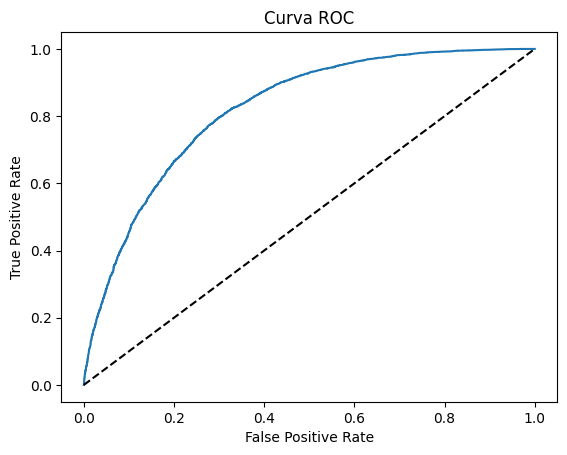

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], "k--")
plt.title("Curva ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [19]:
model_filename = "diabetes.pkl"

with open(model_filename, "wb") as file:
    pickle.dump(best_model_rf, file)

scaler_filename = "scaler.pkl"

with open(scaler_filename, "wb") as file:
    pickle.dump(scaler, file)

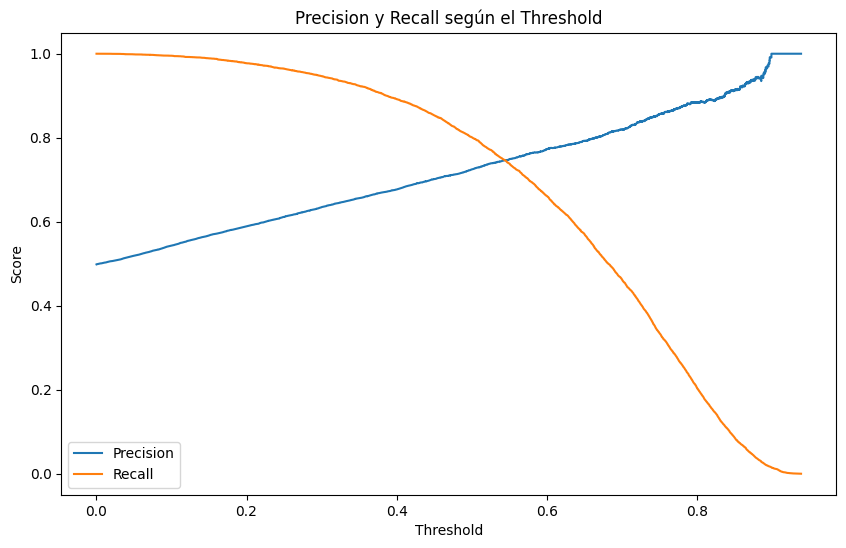

In [31]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_prob_rf)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision y Recall según el Threshold')
plt.legend()

plt.show()

In [17]:
# Logistic regression 

param_grid = {
    "C": [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    "penalty": ["l2","l1"], 
    "solver": ["liblinear"]
}

scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1",
    "roc_auc": "roc_auc"
}

logreg = LogisticRegression(max_iter=1000)

grid = GridSearchCV(estimator=logreg,
                    param_grid=param_grid,
                    scoring=scoring,
                    refit="recall", 
                    cv=10,
                    n_jobs=-1,
                    )

grid.fit(X_train_scaled, y_train)

y_pred_logreg = grid.predict(X_test_scaled)
y_prob_logreg = grid.predict_proba(X_test_scaled)[:, 1]

print("Mejores parámetros:", grid.best_params_)
print("Mejor estimador:", grid.best_estimator_)
print("Mejor score:",grid.best_score_)

print("\nMétricas en test:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Precision:", precision_score(y_test, y_pred_logreg))
print("Recall:", recall_score(y_test, y_pred_logreg))
print("F1 Score:", f1_score(y_test, y_pred_logreg))
print("ROC AUC:", roc_auc_score(y_test, y_prob_logreg))

print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_logreg))

Mejores parámetros: {'C': 0.005, 'penalty': 'l1', 'solver': 'liblinear'}
Mejor estimador: LogisticRegression(C=0.005, max_iter=1000, penalty='l1', solver='liblinear')
Mejor score: 0.7726260324978422

Métricas en test:
Accuracy: 0.7435462196760733
Precision: 0.7298240902376796
Recall: 0.7710313519648178
F1 Score: 0.7498620309050773
ROC AUC: 0.8226685816651963

Matriz de Confusión:
[[5078 2012]
 [1614 5435]]
